In [25]:
#Import the libraries that will be used
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np


In [27]:
path = 'water_use_NV_converted.csv'
#Making a datframe out of the 
NV_raw = pd.read_csv(path)
NV_raw

FileNotFoundError: [Errno 2] File water_use_NV_converted.csv does not exist: 'water_use_NV_converted.csv'

In [24]:
to_numeric = {'year':float,'Public Supply population served by groundwater, in thousands':float,'Public Supply population served by surface water, in thousands':float}
NV_raw2 = NV_raw.astype(to_numeric)
NV_raw2
NV_county_summary = pd.DataFrame(NV_raw2.groupby("county_name").count())

In [21]:
NV_county_summary["Average Ground Water Used per County"] = pd.DataFrame(NV_raw2.groupby("county_name")["Public Supply population served by groundwater, in thousands"].mean())
NV_county_summary["Average Surface Water Used per County"] = pd.DataFrame(NV_raw2.groupby("county_name")["Public Supply population served by surface water, in thousands"].mean())

NV_county_summary = NV_county_summary[["Average Ground Water Used per County", "Average Surface Water Used per County"]]

NV_county_summary

,Average Ground Water Used per County,Average Surface Water Used per County
county_name,,
Carson City,30.374000,16.408571
Churchill County,12.080714,0.007143
Clark County,121.901429,1177.752857
Douglas County,24.478571,8.525571
Elko County,34.225714,0.687857
Esmeralda County,0.725143,0.000000
Eureka County,0.981429,0.000000
Humboldt County,9.825429,0.000000
Lander County,4.205429,0.022857


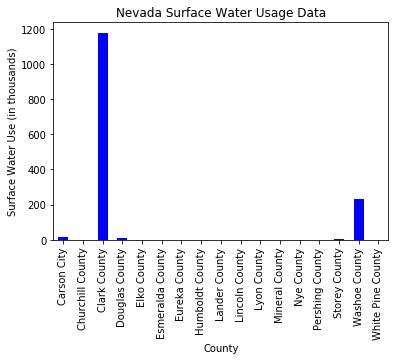

In [19]:
datapoints = NV_county_summary[["Average Surface Water Used per County"]]
datapoints.plot(kind="bar", figsize=(6,4), color = "b", legend=False)
plt.title("Nevada Surface Water Usage Data")
plt.xlabel('County')
plt.ylabel('Surface Water Use (in thousands)')
plt.show()


In [12]:
clark_county = NV_raw.loc[NV_raw["county_name"] == "Clark County",:]

In [13]:
clark_county_data = clark_county.groupby('year').max()["Public Supply population served by surface water, in thousands"]
clarklastcounty = pd.DataFrame(clark_county_data)
clarklastcounty

,"Public Supply population served by surface water, in thousands"
year,
1985.0,402.21
1990.0,618.00
1995.0,844.06
2000.0,1169.60
2005.0,1522.40
2010.0,1754.50
2015.0,1933.50


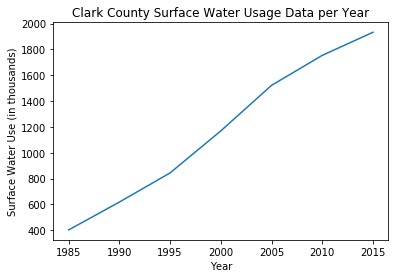

In [14]:
clark_county_data.plot(kind='line',x='year',y='Public Supply population served by surface water, in thousands')
plt.title("Clark County Surface Water Usage Data per Year")
plt.xlabel('Year')
plt.ylabel('Surface Water Use (in thousands)')
plt.show()
